# Project 1 - Stress on a floating wind turbine

**Project deadline:** This project is due for submission on Wednesday, 11.05.2022, 23:59. Please check carefully the *About the Projects* section below for further details.

**Important:** You have the choice to work either on this project or on another one from Thomas. We strongly advise you to read through both project notebooks completely before you take a decision.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignmentts, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects needs to be submitted by uploading a modified version of this notebook to [Projects/Project 1](https://ecampus.uni-bonn.de/goto_ecampus_exc_2645968.html) on eCampus. Please only upload this notebook and no other files. You also do not need to change its filename before your upload. Your project must be on eCampus by Wednesday, 11.05.2022, 23:59. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Thomas and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

### Your Name here please: Vlera Hajdini

# Floating wind turbines
Currently, the demand for renewable energy is very high. Wind turbines are very successful sources of renewable energy, and many states are planning new wind farms to increase the fraction of green energy in the overall consumption. Despite the high demand, it is difficult to establish large new onshore (land-based) wind farms due to space limitations: Attention has to be paid to landscape and neighbors.

The same constraints do not limit offshore wind farms. However, the conventional offshore wind turbine has a foundation which stands on the seafloor. The foundations are limited to a certain height, as the price and complexity of the foundation scales with the water depth. According to Wikipedia, fixed foundations can be installed at sea depth up to around 50 m.

This limits the possible wind farm locations to very few areas in the world where the ocean floor falls off relatively flatly away from the shore. 

Therefore, floating foundations are now being developed by many companies.

While floating wind turbine foundations may solve many problems related to installation of offshore wind, the technologies are still being tested. 

In this project you will work with simulated data measured for a floating foundation with a with a 15 MW wind turbine. For comparison, the standard offshore wind turbine is certified for on the order of 8 MW. Wind turbines in producing in the range of 15-20 MW are being pursued by many of the manufacturing companies. 


### This project
In this project, we will consider data from simulations of a floating 15 MW offshore turbine in operation. The data contains the values shown in this figure as a function of time. 


<img src="figs/windTurbinePicture1.png" width="400" height="200" />








## Necessary Python packages

In [1]:
# We need some modules (Python libraries) in the following.
# Usually, such modules are loaded in the first cell of a notebook.
# The modules that we need concern loading the data and plotting
# them later.

# all plots should appear directly within the notebook
%matplotlib inline

# modules necessary for plotting
import matplotlib.pyplot as plt

# seaborn just makes plots look a bit nicer - not
# absolutely necessary though.
import seaborn as sns
sns.set_style("whitegrid")

# modules to load the data. The Pandas module
# is just needed for a quick data-loading demonstration at the
# start of the Notebook. 
import pandas as pd


# module to make avilable data structures and routines
# for numerics
import numpy as np


# Loading the data
One great feature of `Python` is the ability to load all kinds of standardised data-formats into memory - in most cases with a single command. The data can be located on your disk or on the Web. 

You need to download the file "Bending moment tower bottom 15 MW offshore wind turbine.csv" from the github. 

In [2]:
filename = "data/Orcaflex Simulation, 15 MW wind turbine.csv"

data = pd.read_csv(filename, # Here we load the file
                   delimiter=';') # Delimiter tells how the rows are separated
data # print a preview of the data

,Orcaflex Simulation of 15 MW floating offshore wind turbine,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time,Wind speed,Sea surface,Mooring force,Tilt,Nac. acc.,Tower mom.
2,(s),(m/s),(m),(kN),(deg.),(m/s2),(kNm)
3,0,32.98,0.47,7436.27,-5.56,-1.25,-806154.06
4,0.1,33.24,0.29,7457.32,-5.55,-1.25,-806570.1
...,...,...,...,...,...,...,...
35999,3599.6,52.96,0.39,5494.01,-4,-0.23,-518214.75
36000,3599.7,53.64,0.3,5510.76,-4,-0.21,-516202.25
36001,3599.8,54.17,0.21,5525.76,-4,-0.19,-514701.78
36002,3599.9,54.54,0.11,5539.14,-3.99,-0.18,-513763.14


The data does not look as we want it to. The first line includes the name of the data, and the header is only in line 1. Therefore, we need to exclude the first few rows. 

The ```header``` argument tells the function which row contains the headers of the columns. The ```skiprows``` tells the function if some rows should be skipped. We will skip the row containing the units for now.

In [3]:
data = pd.read_csv(filename, delimiter = ';', header=2, skiprows=[3])
data

,Time,Wind speed,Sea surface,Mooring force,Tilt,Nac. acc.,Tower mom.
0,0.0,32.98,0.47,7436.27,-5.56,-1.25,-806154.06
1,0.1,33.24,0.29,7457.32,-5.55,-1.25,-806570.10
2,0.2,33.66,0.11,7475.07,-5.53,-1.24,-806385.89
3,0.3,34.23,-0.06,7489.50,-5.51,-1.23,-805549.79
4,0.4,34.95,-0.22,7500.62,-5.49,-1.21,-804060.69
...,...,...,...,...,...,...,...
35996,3599.6,52.96,0.39,5494.01,-4.00,-0.23,-518214.75
35997,3599.7,53.64,0.30,5510.76,-4.00,-0.21,-516202.25
35998,3599.8,54.17,0.21,5525.76,-4.00,-0.19,-514701.78
35999,3599.9,54.54,0.11,5539.14,-3.99,-0.18,-513763.14


We see that the data set contains
* Time in s
* Wind speed in m/s
* Sea surface offset from 'flat water' conditions in m. This is the wave height
* Mooring force in kN. This is the force on the anchor lines  
* Tilt in degrees
* Nacelle acceleration in m/s$^2$. The nacelle is the 'house' on top of the turbine where the rotor is attached
* Tower moment in kN m. This is the torque on from the tower moving with respect to the foundation.  

We make arrays out of the different columns. 

In [4]:
t = np.array(data['Time']) 
seaSurface = np.array(data['Sea surface'])
tilt = np.array(data['Tilt'])
mooring = np.array(data['Mooring force'])
nacAcc = np.array(data['Nac. acc.'])
towerMom = np.array(data['Tower mom.'])
windSpeed = np.array(data['Wind speed'])


We can now visualize the data. For instance the sea level. Run the cell to see the output.

Text(0, 0.5, 'Sea level (m)')

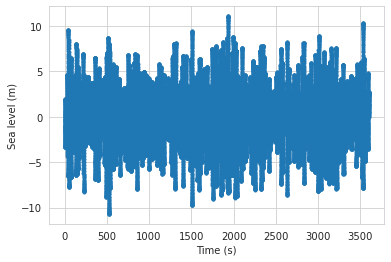

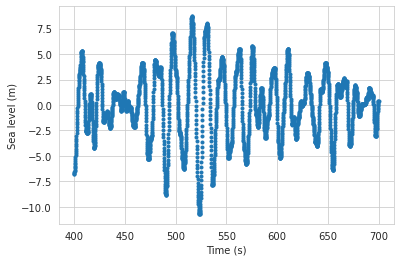

In [5]:

# We plot the sea level as a function of the time
plt.plot(t,seaSurface,'.')
plt.xlabel('Time (s)')
plt.ylabel('Sea level (m)')

#This looks a bit messy!

# Let's consider a small time window of 5 minutes = 300 s.
plt.figure()
plt.plot(t[(t>400) & (t<700)], seaSurface[(t>400) & (t<700)],'.')
plt.xlabel('Time (s)')
plt.ylabel('Sea level (m)')


We see that the system is subject to rather strong moments. We also see that it is useful to slice an array to a specific time window.

It may also later become useful to normalize two arrays to make it easier to compare them. Therefore, we define the following two functions:

In [6]:
def sliceArray(array, t, mintime, maxtime):
    # To slice in time we select only datapoints satisfying the greater than 
    # and smaller than requirements.
    slicedArray = array[(t>mintime) & (t<= maxtime)]
    return slicedArray

def normalizeArray(array):
    # To normalize an array, we subtract the minimum value 
    # and divide by the maximum value
    normalizedArray = (array-min(array))/max(array-min(array))
    return normalizedArray

# Your tasks
**Note:** Please continue this notebook and do all the following tasks within that notebook. Please comment appropriately all code-blocks and perform the necessary discussions of your results in Markup cells. All plots must have appropriate axes-labels and a title! Your project submission will consist of the modified notebook.

0. From looking at the figure where the different parameters are shown, which quantities would you expect to be correlated? (0 points, but give it a thought!)


1. Use the ```numpy``` functionality to find the maximum and minimum values and answer the following questions: How far above and below the normal sea level does the sea get? How far are these events from each other in time?  What is the maximal wind speed in km/h? What is the biggest moment experienced by the tower - do you think the sign matters in this case?

**Hint** you can use ```np.argmax``` and ```np.argmin``` or ```np.where``` to answer the time-difference question.



In [52]:
#Maximal height above normal sea level
#np.max (or just max) takes the maximum value of the array in this case
maxHeight = np.max(seaSurface)
print("Maximum height of the sea Surface:",maxHeight)

#Maximal height below normal sea level
#np.min (or just min) takes the minimum value of the array in this case
minHeight = np.min(seaSurface) 
print("Minimum height of the sea Surface:",minHeight)


#argmax and argmin find the index belonging to the maximum value of a quatity.
maxArg = np.argmax(seaSurface)
minArg = np.argmin(seaSurface)

#Time difference in the two extremums of the sea surface
tdiff = t[maxArg] - t[minArg]
print("Time difference between the two extrema:",tdiff)

#Maximal wind speed in km/h
maxWindSpeed = np.max(windSpeed)
print("Wind speed:",maxWindSpeed)

#Maximum moment experienced by the tower
maxMoment = np.max(towerMom) 

print("Maximum of absolute tower moment:",np.max(np.abs(towerMom)))
print("Maximum of tower moment:",maxMoment)



Maximum height of the sea Surface: 11.05
Minimum height of the sea Surface: -10.69
Time difference between the two extrema: 1411.5
Wind speed: 70.31
Maximum of absolute tower moment: 1327809.46
Maximum of tower moment: -1645.26


#### Comment for Task 1:

The negative signs of the height and the tower moment are simply assigned to the data to distinguish the directions.
For the case of the height of the sea level, it being negative simply means that its below the surface. 
As for the tower moment being negative, simply represents the direction of the bending compared to a reference plane.


2. Normalize and compare the different datasets to each other by plotting them together for a time window of your choice. It can be useful to separate the different plots with an offset as here:
```plt.plot(t,windSpeedNorm+0); plt.plot(t,seaSurfaceNorm+1)```
Does any of the datasets seem completely uncorrelated with the others? 

    We observe that the acceleration of the nacelle and the tower moment are correlated. Why do you think this is the case? How do you think it scales? 
    
    ***Hint:*** Which of Newton's laws would describe such a correlation?



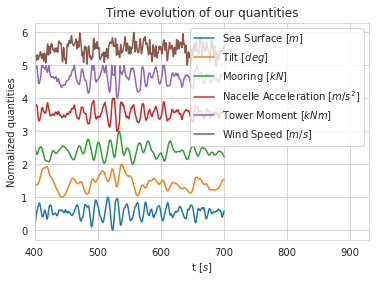

In [50]:
#normalizing the sliced arrays for the quatities of the problem for a specific time window
#using the function "normalizeArray" already presented to us.
normseasurface = normalizeArray(sliceArray(seaSurface, t, 400, 700))
normtilt = normalizeArray(sliceArray(tilt, t, 400, 700))
normmooring = normalizeArray(sliceArray(mooring, t, 400, 700))
normacc = normalizeArray(sliceArray(nacAcc, t, 400, 700))
normtowermom = normalizeArray(sliceArray(towerMom, t, 400, 700))
normwindspeed = normalizeArray(sliceArray(windSpeed, t, 400, 700))

#Slicing the time that we will need for the "x" axis
#We use this time period because we normalized for this specific time
tslice = t[(t>400) & (t<=700)]
#Plotting every quatity per the time above
plt.plot(tslice, normseasurface, label="Sea Surface [$m$]")
plt.plot(tslice,normtilt+1, label="Tilt [$deg$]")
plt.plot(tslice,normmooring+2, label = "Mooring [$kN$]")
plt.plot(tslice,normacc+3, label = "Nacelle Acceleration [$m$/$s^{2}$]")
plt.plot(tslice,normtowermom+4, label = "Tower Moment [$kNm$]")
plt.plot(tslice,normwindspeed+5, label = "Wind Speed [$m/s$]")
plt.xlabel('t [$s$]')
plt.ylabel('Normalized quantities')
plt.xlim(400,930)
plt.legend(loc = 'upper right')
plt.title("Time evolution of our quantities")
plt.show()


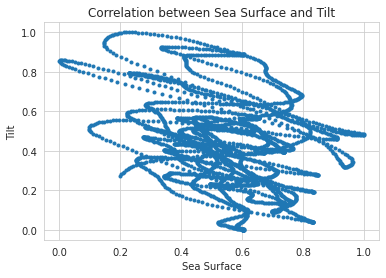

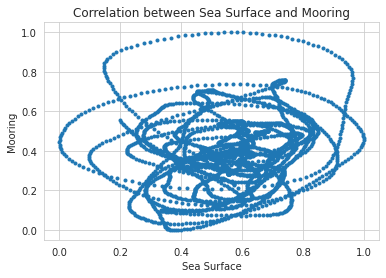

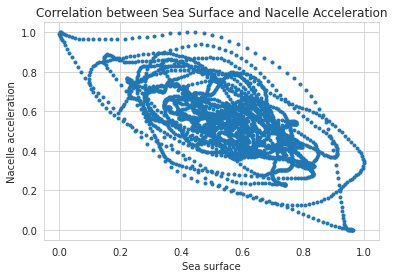

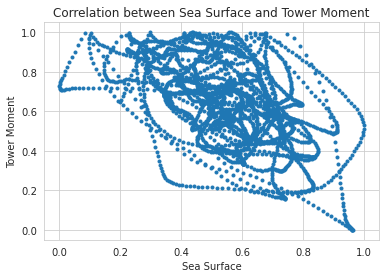

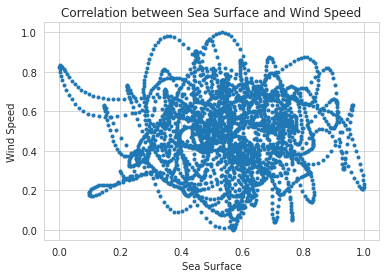

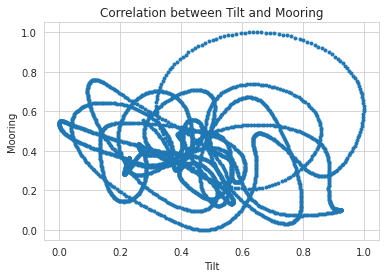

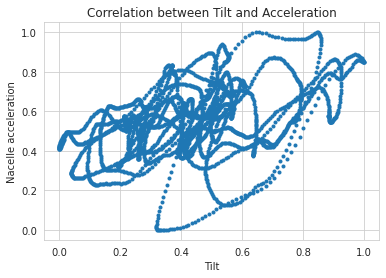

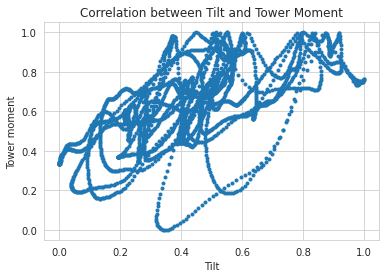

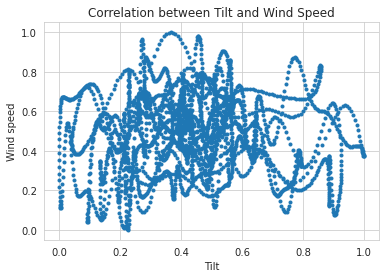

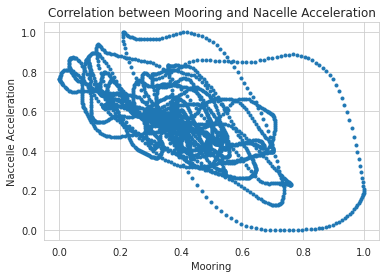

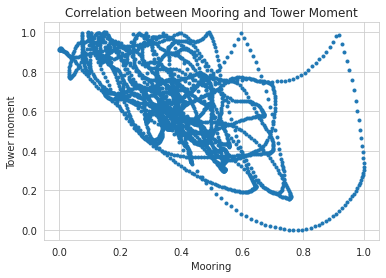

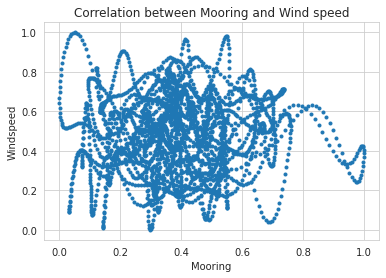

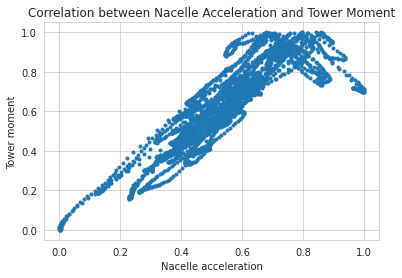

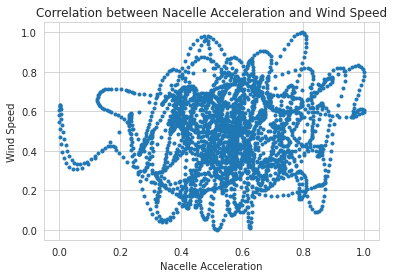

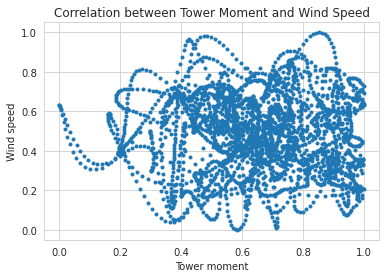

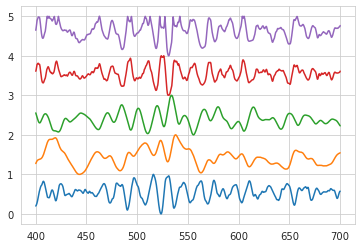

In [18]:

#plotting each quatity with with respect to one another, to find the correlation
plt.plot(normseasurface,normtilt,'.')
#Labeling the x axis.
plt.xlabel('Sea Surface')
#Labeling the y axis
plt.ylabel('Tilt')
#Titling the plot
plt.title('Correlation between Sea Surface and Tilt')
plt.show()

plt.plot(normseasurface,normmooring,'.')
plt.xlabel('Sea Surface')
plt.ylabel('Mooring')
plt.title('Correlation between Sea Surface and Mooring')
plt.show()

plt.plot(normseasurface,normacc, '.')
plt.xlabel('Sea surface')
plt.ylabel('Nacelle acceleration')
plt.title('Correlation between Sea Surface and Nacelle Acceleration')
plt.show()

plt.plot(normseasurface,normtowermom, '.')
plt.xlabel('Sea Surface')
plt.ylabel('Tower Moment')
plt.title('Correlation between Sea Surface and Tower Moment')
plt.show()

plt.plot(normseasurface,normwindspeed,'.')
plt.xlabel('Sea Surface')
plt.ylabel('Wind Speed')
plt.title('Correlation between Sea Surface and Wind Speed')
plt.show()

plt.plot(normtilt,normmooring, '.')
plt.xlabel('Tilt')
plt.ylabel('Mooring')
plt.title('Correlation between Tilt and Mooring')
plt.show()

plt.plot(normtilt,normacc, '.')
plt.xlabel('Tilt')
plt.ylabel('Nacelle acceleration')
plt.title('Correlation between Tilt and Acceleration')
plt.show()

plt.plot(normtilt,normtowermom,'.')
plt.xlabel('Tilt')
plt.ylabel('Tower moment')
plt.title('Correlation between Tilt and Tower Moment')
plt.show()

plt.plot(normtilt,normwindspeed,'.')
plt.xlabel('Tilt')
plt.ylabel('Wind speed')
plt.title('Correlation between Tilt and Wind Speed')
plt.show()

plt.plot(normmooring,normacc,'.')
plt.xlabel('Mooring')
plt.ylabel('Naccelle Acceleration')
plt.title('Correlation between Mooring and Nacelle Acceleration')
plt.show()

plt.plot(normmooring,normtowermom,'.')
plt.xlabel('Mooring')
plt.ylabel('Tower moment')
plt.title('Correlation between Mooring and Tower Moment')
plt.show()

plt.plot(normmooring,normwindspeed,'.')
plt.xlabel('Mooring')
plt.ylabel('Windspeed')
plt.title('Correlation between Mooring and Wind speed')
plt.show()

plt.plot(normacc,normtowermom,'.')
plt.xlabel('Nacelle acceleration')
plt.ylabel('Tower moment')
plt.title('Correlation between Nacelle Acceleration and Tower Moment')
plt.show()

plt.plot(normacc,normwindspeed,'.')
plt.xlabel('Nacelle Acceleration')
plt.ylabel('Wind Speed')
plt.title('Correlation between Nacelle Acceleration and Wind Speed')
plt.show()

plt.plot(normtowermom,normwindspeed,'.')
plt.xlabel('Tower moment')
plt.ylabel('Wind speed')
plt.title('Correlation between Tower Moment and Wind Speed')
plt.show()




#### Comment for Task 2:

##### Nacelle Acceleration and Tower Moment are correlated

From the plots we observe that the Nacelle Acceleration and Tower Moment are the only quantities that are strongly correlated. This happens, because the turbine is bounded from below with some ropes. Thus, when the Nacelle accelerates (moves with some non-constant velocity), that acceleration is angular and not linear. And, this acceleration is always accompanied with an angular momentum of the object being accelerated (in this case the tower, since they are connected (bounded) with the Nacelle).

These two quantities must be linearly correlated. According to Newton's Second Law for angular motion, torque is equal to the product of moment of inertia and angular acceleration:  

$$
L=I\cdot\alpha
$$


##### Also, there are a few quantities that seem to be weakly correlated, like: 

Tower Moment and Tilt and,

Tilt and Nacelle Acceleration.

##### And then a few more quantities that show traces of negative correlation, for example: 

Sea Surface and Nacelle Acceleration 

Sea Surface and Tower Moment 

Nacelle Acceleration and Mooring 

Tower Moment and Mooring.

##### And finally, the quantities that seem to be uncorrelated are: 

Sea Surface and Tilt 

Sea Surface and Mooring

Sea Surface and Wind Speed 

Tilt and Mooring 

Wind Speed and Tilt 

Wind Speed and Nacelle Acceleration

Wind Speed and Tower Moment.



3. We will test whether the datasets are correlated by calculating the correlation between them. 

    The correlation between two parameters can be estimated with the correlation coefficient, which depends on the covariance. 
    The covariance is defined as
    
    \begin{align}
    \mathrm{cov}(X_1, X_2) = \left\langle(X_1-\langle X_1 \rangle) \cdot ( X_2-\langle X_2 \rangle )\right\rangle
    \end{align}
    
    where we use $\langle \cdots \rangle$ as the expectation value, such that $\langle X_1 \rangle$ is the mean of the variable $X_1$. Note how the covariance resembles to the variance $\mathrm{var}(X_1) = \left\langle(X_1-\langle X_1 \rangle)^2 \right\rangle$.
    
    The covariance between $X_1$ and $X_2$ describes to how large a degree the variation of $X_1$ and $X_2$ is related. To compare covariances it is sensible to normalize with the variances of the two parameters. This gives us the correlation coefficient, which is defined as 
        
    \begin{align}
    \mathrm{corr}(X_1, X_2) = \frac{\left\langle(X_1-\langle X_1 \rangle) \cdot ( X_2-\langle X_2 \rangle )\right\rangle}{\sqrt{\mathrm{var}(X_1)}\cdot \sqrt{\mathrm{var}(X_2)}}
    \end{align}
    
    A correlation parameter close to 1 means that the variation of $X_1$ and $X_2$ is strongly correlated. A value close to zero means that the parameters are not varying together. A value close to -1 means that they are anti-correlated: If one goes up, the other one goes down, so to say.

    Calculate the correlation parameter and find
    - the parameters which are most and least related to the sea surface level.
    - the parameters which are most and least related to tower moment.
    
    Are you surprised by the result?

In [9]:
def cov (x1,x2):
    """
    Takes in two arrays of the same size and gives the correlation parameter between the data points
    """
    #Defining the variables
    
    #The agument within mean for the covariance
    mx1 = x1 - np.mean(x1)
    mx2 = x2 - np.mean(x2)
    #Covariance
    covar =np.mean(mx1*mx2)
    #Variance is just the mean of the square of the argument of the covariance
    varx1 = np.mean(mx1**2) 
    varx2 = np.mean(mx2**2)
    #Correlation 
    corr = covar/(np.sqrt(varx1)*np.sqrt(varx2))
    return corr

#Sea Surface
print("Correlation parameter of Sea Surface")
print("with Tilt:",cov(seaSurface, tilt))
print("with Mooring:",cov(seaSurface, mooring))
print("with Naccelle Acceleration:", cov(seaSurface, nacAcc))
print("with Tower Moment:",cov(seaSurface, towerMom))
print("with Wind Speed:",cov(seaSurface, windSpeed))

print('-------------------------------------')

#Tower Moment
print("Correlation parameter of Tower Moment")
print("with Sea Surface",cov(towerMom, seaSurface)) #this is already upstairs,
#I just write it for consistency
print("with Tilt:",cov(towerMom, tilt))
print("with Mooring:",cov(towerMom, mooring))
print("with Naccelle Acceleration:",cov(towerMom, nacAcc))
print("with Windspeed:",cov(towerMom, windSpeed))

Correlation parameter of Sea Surface
with Tilt: -0.3961419648815372
with Mooring: 0.13465198247473426
with Naccelle Acceleration: -0.6212418534160657
with Tower Moment: -0.5385091854754052
with Wind Speed: 0.02581689806421358
-------------------------------------
Correlation parameter of Tower Moment
with Sea Surface -0.5385091854754052
with Tilt: 0.6099168579631556
with Mooring: -0.6455875936823036
with Naccelle Acceleration: 0.9047304290585231
with Windspeed: -0.021849130317860725


#### Comment for Task 3:

In my opinion it is surprising that the Sea Surface and the Tower Moment are uncorrelated with the Wind Speed, as the wind speed should impact the height of the waves in the sea, and also could bend the tower, thus giving it an angular moment. However, this does not seem to be the case. 

I also find it a bit non-intuitive that the Sea Surface has quite some (negative) correlation with the Nacelle acceleration, as it does not seem likely that these quantities impact one another to that extent. However, it appears that they do. 

4. In exercise 1 we found the minima and maxima of the sea height and we investigated how far apart the deepest through and the highest peak were.
    In stability analysis the maximal values are not always of immediate interest, because these values may only appear very far apart in time. Instead it may be more interesting to consider how many small cycles some parameter performs. 

- For the mooring force, find all the local minima and maxima for the mooring force time series between t = 0 s and t = 2000 s. You will see methods for doing this in the lecture review.
- Make a histogram of the difference in force between each minima and maxima. Remember to do this on both sides of a peak. The figures below show the first four differences to calculate for the interval from 400 s to 700 s, and a histogram with 10 bins of the forces. Use the histogram to check your method and create a histogram for the mooring force time series between t = 0 s and t = 2000 s.
- Compare the histogram with the difference between the global maximum and global minimum and comment.



<img src="figs/mooringForceMaxMinHistogram.png" width=800px/>



#### Comment for Task 4:

To find the local maxima and minima we have used the "for" and "if" loop in combination with the boolean object "and". 

For a point $i$ of a function to be a maxima it has to be larger than the point $i-1$, but also larger than the point $i+1$. Similarly, for a point $j$ to be a minima of a function it has to be smaller than $j-1$ and also smaller than $j+1$. This is the base logic of the code below. 

Consequently. if the points of the Mooring function fulfill the condition above, we append them into an array, and we also append their indices, because we will need them later for the histogram.

Also, I have used $"len(L) - 2"$ to exclude the beginning point and the ending point of the function,
because for those points there is no neighborhood to compare them with, and thus, they can not fulfill the condition to be a minima or a maxima.

In [10]:
def locminmax(L):
    """Takes in an array and returns the values of the local extremums and their indices"""
    #The arrays where we will group the maxima, minima and their indices(tmax/min), respectively.
    maxx = []
    tmax = []
    minn = []
    tmin = []
    #We make a for loop and group the maximas and minimas using the command "append"
    #which groups the maximas and minimas if they fulfill the condition explained above. 
    for i in range(len(L) - 2):
        if ((L[i+1] > L[i]) and (L[i+1] > L[i+2])):
            #append simply gathers the points that fulfill the line above condition
            #to the one of the arrays defined in the beggining of this code.
            maxx.append(L[i+1])
            
            tmax.append(i+1)
        if ((L[i+1] < L[i]) and (L[i+1] < L[i+2])):
            minn.append(L[i+1])
            tmin.append(i+1)
    return maxx, tmax, minn, tmin

In [11]:
#You can change the time slice here to see if the histogram below corresponds with 
#with the one you have give in the task.
maxx, tmax, minn, tmin = locminmax(sliceArray(mooring,t,0,2000))
print("Local Maxima:")
print(maxx)
print("----------------------------------------------------------")#To separate between the maxima and minima.
print("Local Minima :")
print(minn)

Local Maxima:
[7515.09, 5672.46, 5775.28, 8395.55, 6208.28, 7442.05, 5367.41, 5303.48, 5332.21, 7171.48, 8245.2, 6273.93, 6659.96, 5538.92, 5035.37, 6392.78, 6820.1, 6573.77, 5422.92, 6445.9, 4725.3, 5061.98, 6136.66, 4825.12, 6064.9, 8003.91, 5962.3, 7912.96, 6243.23, 5261.47, 6400.02, 6454.54, 8156.73, 7413.21, 7965.25, 10186.5, 5875.08, 7186.95, 7726.79, 4597.8, 7672.57, 5010.8, 5407.66, 6329.94, 5969.62, 4830.17, 5111.11, 6096.05, 5852.29, 5672.42, 7387.99, 6847.52, 5768.24, 7132.48, 6104.29, 8667.71, 7807.91, 6646.14, 5339.3, 6759.68, 5590.38, 5650.02, 5743.26, 7297.33, 7390.65, 5447.05, 6810.36, 6695.85, 5234.27, 6831.79, 5477.16, 4196.92, 6957.05, 6174.31, 5976.76, 5528.69, 6144.07, 6340.75, 7187.72, 5720.08, 5370.53, 5637.52, 5637.46, 5292.68, 7035.68, 6328.21, 7340.85, 8453.13, 8862.79, 4572.15, 3751.37, 3871.85, 7292.65, 6493.81, 5945.8, 8242.21, 5148.42, 7399.45, 7307.66, 5427.7, 5439.75, 8725.98, 9101.68, 5499.94, 6383.5, 5213.52, 4733.13, 6349.9, 8448.89, 5284.7, 4671.55, 

#### Comment for Task 4:

For the construction of the histogram for the differences of the local maxima and minima, we consider the different cases where the number of maxima and the minima might differ and thus, the difference estimation changes. 


##### If the number of the maxima is bigger than the number of the minima:
We append the difference of them for the same indices, and the difference of the consecutive maxima with the previous minima, since two consecutive maxima subtract the same minima. If this is the case, we append the differences in our defined "diff" array. 

##### If the number of the minima is bigger than the number of the maxima:
we have the same situation as above but now for the minima. So, now, the same maximum subtracts two consecutive minima. If this is the case, we append the differences in our defined "diff" array.

##### If the number of minima and maxima is equal:
In this case we need to know if a minima or a maxima occurs first. In case the function, has a maxima first, then the time for which the first point (maxima) happens must be smaller than the time for which the first minima happens. In this case, we simply proceed with the usual index per index subtraction, but then continue with the consecutive maxima subtraction with the previous minima, and then the same maxima with the consecutive minima subtraction. 

Whats left from all of this, is when the first point is a minima, in this case is the same as it was for maxima, just their roles are reversed. 

Finally we plot the histogram and it seems to work. 

This part of the project me and my team mate discussed it together, so we might have the same idea behind the code, but of course both of us understood what we are doing. 

(array([32., 30., 34., 44., 42., 31., 18., 23., 15.,  6.]),
 array([2.200000e-01, 6.755110e+02, 1.350802e+03, 2.026093e+03,
        2.701384e+03, 3.376675e+03, 4.051966e+03, 4.727257e+03,
        5.402548e+03, 6.077839e+03, 6.753130e+03]),
 <BarContainer object of 10 artists>)

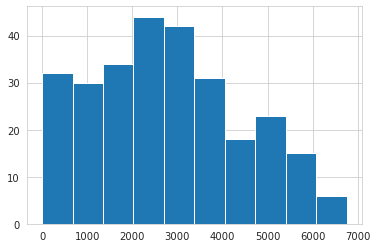

In [12]:
#The array where we will group the differences between the maxima and the minima
diff = []
#Considering different cases of how the difference is impacted based on the number of 
#local maxima and minima

#When number of maxima is bigger than number of minima
if len(maxx) > len(minn):
    for i in range(len(minn)):
        diff.append(maxx[i] - minn[i])
        diff.append(maxx[i+1] - minn[i])
        
#When number of minima is bigger than number of maxima
elif len(maxx) < len(minn):
    for i in range(len(maxx)):
        diff.append(maxx[i] - minn[i])
        diff.append(maxx[i] - minn[i+1])
        
#When number of maxima and minima is equal
else:
#In case the first extrema is a maxima
    if t[tmax[0]] < t[tmin[0]]:
        for i in range(len(maxx)-1):
            diff.append(maxx[i] - minn[i])
            diff.append(maxx[i+1] - minn[i])
        diff.append(maxx[i+1] - minn[i+1])
#In case the first extrema is a minima
    else:
        for i in range(len(maxx)-1):
            diff.append(maxx[i] - minn[i])
            diff.append(maxx[i] - minn[i+1])
        diff.append(maxx[i+1] - minn[i+1])

#Plotting the histogram
plt.hist(diff, bins=10)

In [13]:
#difference between global maximum and global minimum
print("Difference between global maximum and global minimum:",max(mooring)-min(mooring))

Difference between global maximum and global minimum: 8439.46


#### Comment for Task 4:

The global extrema difference lies somewhere further on the right tail of the distribution of the differences between local extrema, that is because the global maximum and minimum is the highest and the lowest peak, respectively, of the fuction and thus, their difference is bigger than the difference between the local minima and maxima. Also, the highest and the lowest peak of a function occurs just once, thus the difference of global maximum and minimum stands on the further tail of the distribution. 

5. We would like to dimension the tower on the basis of the maximum tower bottom moment. 
    The tower is a hollow steel cylinder with an outer diameter of 10 m and a wall thickness T. 

    The bending stress in a hollow cylinder is
    \begin{align}
    s = \frac{M_b}{W}
    \end{align}
    where $s$ is the stress, $M_b$ is the maximum bending moment, and $W$ is the moment of resistance. 
    The bending stress needs to be lower than the maximum allowable stress. For the common steel type, FE 510, the maximum allowable stress is 345 MPa. 

    The moment of resistance for a hollow cylinder is
    \begin{align}
    W = \frac{\pi}{64}\frac{D_o^4 – D_i^4}{D_o}
    \end{align}
    where $D_o$ is the outer diameter and $D_i$ is the inner diameter. 

    Write a function that returns the minimum allowable wall thickness T of the tower for a given maximum stress and calculate for the maximum stress recorded during the one hour simulation period.
    Does the result surprise you?
    

#### Comment for Task 5:

For this task we want to estimate the minimum thickness of the walls of the construction for it not to break.

We have a given outer diameter, $D_o=10m$, and we know that stress on the hollow cylinder $s = \frac{M_b}{W}$ should be smaller than $345MPa$, for the cylinder not to break. $M_b$ Is the maximum bending moment which we have already estimated in the first task (maximum of Tower Moment). And we have the relation for the moment of resistance for a hollow cylinder $W$ given above. 

Therefore we have,

$$
    s = \frac{M_b}{W} <345 \\
    \implies W>\frac{M_b}{345[MPa]} \\
    \implies D_o^4-D_i^4>\frac{Mb\cdot D_o\cdot 64}{345[MPa]\cdot\pi} \\
    \implies D_i <\sqrt[4]{D_o^4-\frac{Mb\cdot D_o\cdot 64}{345[MPa]\cdot\pi}} \\
    \implies D_o-D_i > D_o-\sqrt[4]{D_o^4-\frac{Mb\cdot D_o\cdot 64}{345[MPa]\cdot\pi}} \\
$$

Thickness of the cylinder is  $T=\frac{D_o-D_i}{2}$. Thus, we get,

$$ 
T>\frac{1}{2} \cdot \left( D_o-\sqrt[4]{D_o^4-\frac{Mb\cdot D_o\cdot 64}{345[MPa]\cdot\pi}}\right)\ (*)
$$

We now write a code that simply estimates $T$.

In [14]:
def minthickness(Mb):
    """Takes the maximum of the tower moment and returns the minimum thickness of the tower"""
    #Outer diameter
    Do = 10
    #The second term within the square root, 
    #Here I have converted every unit to SI base.
    val1 = (Mb*10**3*Do*64)/(345*10**6*np.pi)
    #Estimating the square root term
    val2 = (Do**4 - val1)
    val3 = val2**(1/4)
    #Thickness of the cylinder, equation (*)
    T = (1/2)*(Do - val3)
    return T
#We take the maximal absolute value of the tower moment, because we just need the absolute value in this case,
#and not its direction.
Mb= np.max(np.abs(towerMom))
print("Minimum thickness of the cylinder for it not to break:",minthickness(Mb),"m")

Minimum thickness of the cylinder for it not to break: 0.10102788019764652 m


#### Comment for Task 5:

The thickness of the tower should be at least $10cm$ for the tower not to break. This is such a thin layer compared to the outer radius of the cylinder which is $10m$, so it leaves you the impression that this construction would not be so stable. However, we have to also consider that this construction is supposed to be floating in the sea, and having a more solid cylinder would also impact negatively on the stability of construction. 

## Additional information - not related to programming per se

For more information on floating wind turbines, see

https://en.wikipedia.org/wiki/Floating_wind_turbine

This promotional video shows the installation of a 3.6 MW demonstration turbine on a floating foundation https://dock90.com/tetraspar/

The data used in this project was calculated in https://www.orcina.com/orcaflex/ and kindly shared by the TetraSpar Demo team.